## Chapter 15¶

A large portion of this code is taken from Aurélien Géron's: Hands-On machine learning with SciKit-Learn, Keras and Tensorflow (2nd edition). I have put comments based on information in the book as well as information I found elsewhere.

In [1]:
import numpy as np
import keras
from matplotlib import pyplot as plt

In [2]:
# Create a time series
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)  # The 1 at the end denotes univariate series.
                                                                         # i.e. predicting a single value.
                                                                         # If predicting 10 values in the future,
                                                                         # the last 1 would be 10.
    time = np.linspace(0, 1, n_steps)                             # time
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  # wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # noise centered around 0
    return series[..., np.newaxis].astype(np.float32)             # Returns a series:
                                                                  #    [ [[[0.1], [0.2]], [[0.3], [0.4]]], 
                                                                  #      [[[0.5], [0.6]], [[0.7], [0.8]]], 
                                                                  #      [[[0.9], [0.1]], [[0.1], [0.2]]] ]
                                                                  # The newaxis creates a [] around each value.

In [3]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)  # predict (n_steps + 1) value from n_steps values
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

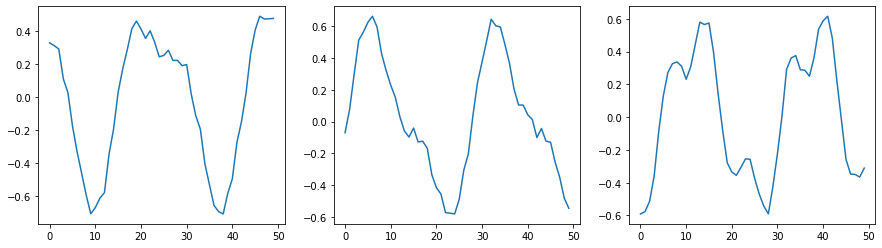

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].plot(X_train[0])
axes[1].plot(X_valid[0])
axes[2].plot(X_test[0]);

### Baseline performance

In [5]:
# Predict baseline performance as the same as
# the last value.
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.02074818

### Linear Regression using a single neuron neural network

In [6]:
# A linear regression model as a neural network
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),  # A fully-connected model needs input to be flattened
    keras.layers.Dense(1)                       # A single neuron. It has a weight and bias. 2 variable neural network
])

In [7]:
model.compile(optimizer='adam', loss='mse')

In [8]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 0s 657us/step - loss: 0.1955
Epoch 2/20
219/219 [==============================] - 0s 651us/step - loss: 0.0359
Epoch 3/20
219/219 [==============================] - 0s 621us/step - loss: 0.0203
Epoch 4/20
219/219 [==============================] - 0s 614us/step - loss: 0.0127
Epoch 5/20
219/219 [==============================] - 0s 625us/step - loss: 0.0091
Epoch 6/20
219/219 [==============================] - 0s 641us/step - loss: 0.0074
Epoch 7/20
219/219 [==============================] - 0s 629us/step - loss: 0.0066
Epoch 8/20
219/219 [==============================] - 0s 618us/step - loss: 0.0060
Epoch 9/20
219/219 [==============================] - 0s 641us/step - loss: 0.0056
Epoch 10/20
219/219 [==============================] - 0s 619us/step - loss: 0.0053
Epoch 11/20
219/219 [==============================] - 0s 659us/step - loss: 0.0050
Epoch 12/20
219/219 [==============================] - 0s 635us/step - loss: 0.0047
E

In [9]:
np.mean(keras.losses.mean_squared_error(y_valid, 
                                        model.predict(X_valid)))

0.0038386823

### RNN

In [10]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1]) # Single neuron RNN. Can process any length input,
                                                     # so input_shape has first shape value as None.
                                                     # SimpleRNN uses tanh activation function by default,
                                                     # which returns values between -1 and 1. So our predicted
                                                     # values must lie in this range.
                                                     # For these reasons, we can use a Dense layer as an output layer.
                                                     # Then:
                                                     #   - we can specify any activation function
                                                     #   - dense layer is a little faster than a SimpleRNN layer
                                                     #   - our output values can match the range of our 
                                                     #     y data values
                                                     # Select the 'Different Activation function' below to see
                                                     # this code in this same notebook.
])

[Different Activation function](#diff_activation_func)

In [11]:
model.compile(optimizer='adam', loss='mse')

In [12]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0239
Epoch 2/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0146
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0118
Epoch 4/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0111
Epoch 5/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0110
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0110
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0110
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0110
Epoch 9/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0110
Epoch 10/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0110
Epoch 11/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0110
Epoch 12/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0110
Epoch 13/20
219/219 [====

In [13]:
np.mean(keras.losses.mean_squared_error(y_valid,
                                        model.predict(X_valid)))

0.011137325

This RNN model did worse than the Linear Regression model because the Linear Regression model had 51 parameters (one weight for each input + bias term. For the RNN, we have one weight for the input and one weight for the hidden state + a bias term totaling 3 parameters.

### Deep RNN

In [14]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),  # Must specify return_sequences=True
    keras.layers.SimpleRNN(20, return_sequences=True),                         # else next layer will get incorrect
                                                                               # shape of input.
    keras.layers.SimpleRNN(1)  # Since we need a single output per time value, use a single neuron at the end
])

In [15]:
model.compile(optimizer='adam', loss='mse')

In [16]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0099
Epoch 2/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0033
Epoch 3/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0031
Epoch 4/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0030
Epoch 5/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0030
Epoch 6/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0029
Epoch 7/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0028
Epoch 8/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0028
Epoch 9/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0028
Epoch 10/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0028
Epoch 11/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0027
Epoch 12/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0027
Epoch 13/20
2

In [17]:
np.mean(keras.losses.mean_squared_error(y_valid,
                                        model.predict(X_valid)))

0.002682076

With the above RNN, we finally beat the Linear Regression model

<a id='diff_activation_func'></a>

In [18]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),  # Must remove return_sequences=True from this layer since the next one
                                 # is not a RNN layer, just a dense layer and will be fully-connected to this layer.
    keras.layers.Dense(1)  # Since we need a single output per time value, use a single neuron at the end.
                           # Having a dense layer here allows us to use any activation function here.
                           # The SimpleRNN layer requires tanh activation function, which outputs values between
                           # -1 and 1. This means our output must also be between -1 and 1.
                           # Alternatively, we could add:
                           #    SimpleRNN(1),
                           #    Dense(1)
                           # and apply a weight and bias to map it into the output value space.
                           # This just increases the number of parameters unnecessarily.
])

In [19]:
model.compile(optimizer='adam', loss='mse')

In [20]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0280
Epoch 2/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0052
Epoch 3/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0039
Epoch 4/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0034
Epoch 5/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0033
Epoch 6/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0031
Epoch 7/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0030
Epoch 8/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0030
Epoch 9/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0029
Epoch 10/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0029
Epoch 11/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0029
Epoch 12/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0029
Epoch 13/20
2

We can see that the above model converges faster than with the SimpleRNN layer at the end, and produces a similar fit

To forecast the 15th step ahead, we can replace the target to be the value 15th step ahead.

### Forecasting several timesteps ahead

#### Bootstrap by forecasting the next timestep and using it to keep forecast the one after it, for 10 timesteps

In [25]:
series = generate_time_series(10000, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])
    y_pred_one = y_pred_one[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
    
y_pred = X[:, n_steps:]
y_pred.shape

(10000, 10, 1)

In [26]:
np.mean(keras.losses.mean_squared_error(Y_new,
                                        y_pred))

0.02767386

We should not compare this error to the single-value prediction earlier.
This is a much harder task that that one.

In [31]:
np.mean(keras.losses.mean_squared_error(series[:, -11:-1],
                                        y_pred))

0.05080372

This is the naive prediction. This error is larger than the previous value because we're expecting the value 10 time steps earlier to be the same as the prediction for this time step.

#### Train RNN to forecast several timesteps ahead